# <font color='289C4E'>EmotiScan - Exploratory Data Analysis<font><a class='anchor' id='top'></a>

---

## Aim

The aim of the project is to develop an end-to-end trained deep Convolutional Neural Network (CNN) and leverage deep learning techniques to build a model that can automatically detect and classify Facial Emotions and Facial Action Coding System (FACS) codes present in images.

1. **Emotion:**

The first objective of the task is to determine whether the image displays a "Positive," "Negative," or "Surprised" emotion on the subject's face. This involves training the CNN to recognize and classify different emotional states based on facial expressions.
 
2. **FACS Codes:**

The second objective aims to predict whether a particular facial action corresponds to a specific FACS code or not. The FACS codes represent different facial movements and muscle actions.
    
This notebook presents the initial data analysis conducted to comprehend the characteristics and structure of the dataset. It includes an examination of data types, distribution, and key variables, providing insights necessary for subsequent modeling and analysis stages. The analysis also visualizes the distribution of high-level emotions and FACS (Facial Action Coding System) codes, helping to elucidate the underlying patterns and trends within the dataset.

---

# <font color='289C4E'>Table of contents<font><a class='anchor' id='top'></a>
- [Data](#Data)
- [Train and Test Splits](#train-and-test-splits)
- [Conclusion](#Conclusion)
    
---

# <font color='289C4E'>Data<font><a class='anchor' id='top'></a>

The dataset used for this project is a subset derived from the CK+ dataset, originally published by Lucey, Patrick, Jeffrey F. Cohn, Takeo Kanade, Jason Saragih, Zara Ambadar, and Iain Matthews. **This dataset is private and not available for direct public access.**

Prior to constructing a model, it is crucial to thoroughly examine and investigate the dataset's variables. This initial analysis helps in understanding the data's structure, types, and distribution, setting a solid foundation for effective modeling and further analysis.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Read the data and the image file paths
data = pd.read_csv("data_labels.csv")
image_paths = data['filepath'].tolist()

# Print initial observations
data.head()

,subject,sequence,image_index,filepath,file_prefix,AU17,AU1,AU2,AU25,AU27,...,AU7,AU23,AU24,AU6,AU12,AU15,AU14,AU11,AU26,high_level_emotion
0,S005,1,11,./cohn-kanade-images/S005/001/S005_001_0000001...,S005_001_00000011,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
1,S010,1,14,./cohn-kanade-images/S010/001/S010_001_0000001...,S010_001_00000014,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,negative
2,S010,2,14,./cohn-kanade-images/S010/002/S010_002_0000001...,S010_002_00000014,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,surprise
3,S010,3,18,./cohn-kanade-images/S010/003/S010_003_0000001...,S010_003_00000018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
4,S010,4,19,./cohn-kanade-images/S010/004/S010_004_0000001...,S010_004_00000019,1,0,0,0,0,...,1,1,1,0,0,0,0,0,0,negative


In [3]:
# Structure of the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   subject             560 non-null    object
 1   sequence            560 non-null    int64 
 2   image_index         560 non-null    int64 
 3   filepath            560 non-null    object
 4   file_prefix         560 non-null    object
 5   AU17                560 non-null    int64 
 6   AU1                 560 non-null    int64 
 7   AU2                 560 non-null    int64 
 8   AU25                560 non-null    int64 
 9   AU27                560 non-null    int64 
 10  AU4                 560 non-null    int64 
 11  AU7                 560 non-null    int64 
 12  AU23                560 non-null    int64 
 13  AU24                560 non-null    int64 
 14  AU6                 560 non-null    int64 
 15  AU12                560 non-null    int64 
 16  AU15                560 no

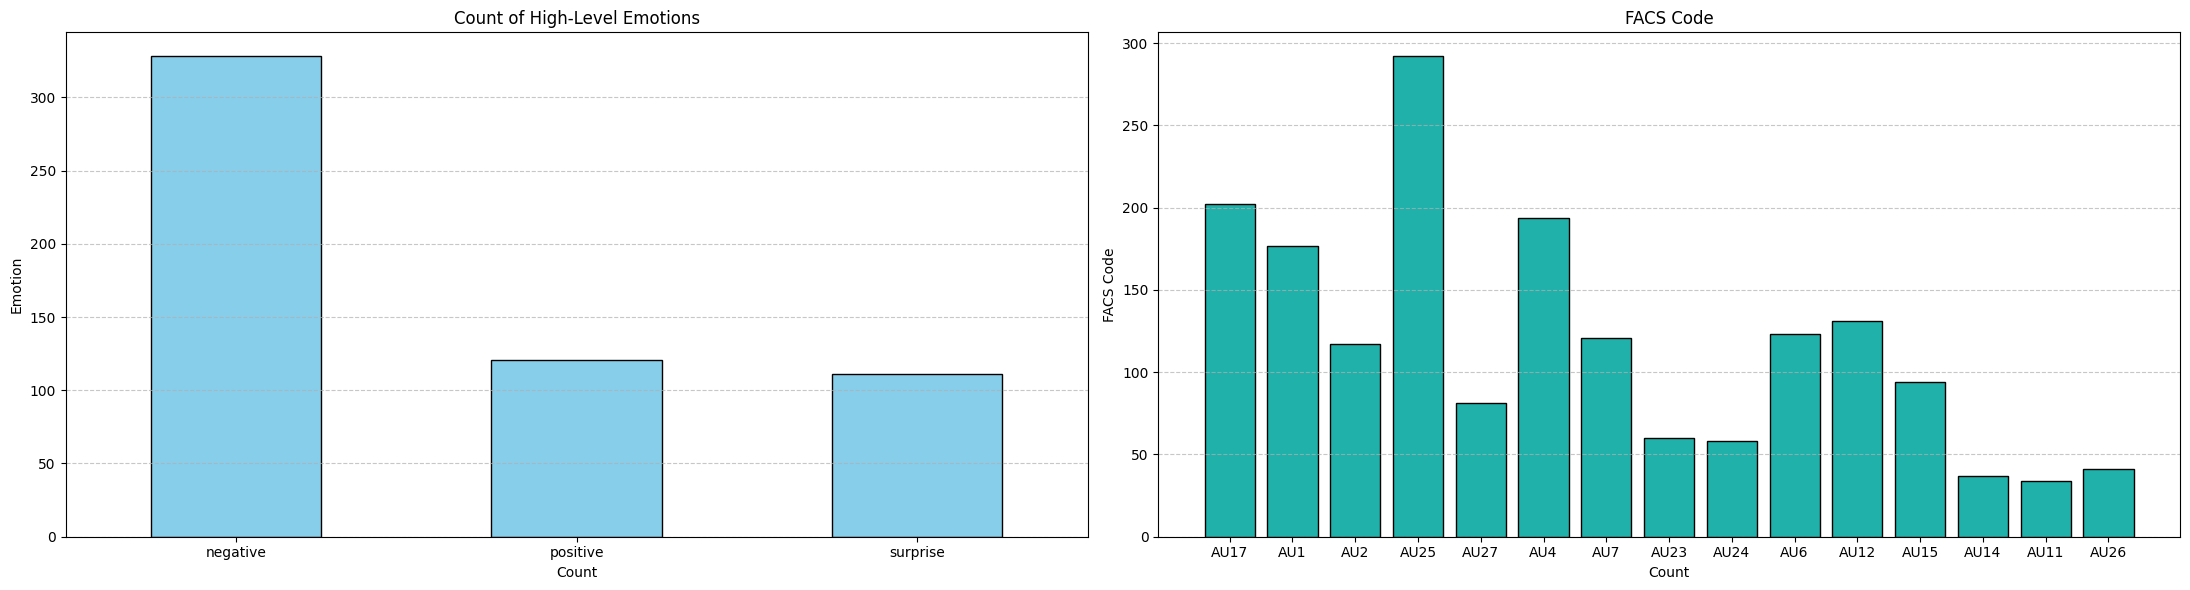

In [4]:
# Visualise the FACS code and Emotion labels
fig, axes = plt.subplots(1, 2, figsize=(22, 6))

# First subplot: High-Level Emotions
data["high_level_emotion"].value_counts().plot(kind="bar", edgecolor="k", ax=axes[0], color='skyblue')
axes[0].set_xlabel("Count")
axes[0].set_ylabel("Emotion")
axes[0].set_title("Count of High-Level Emotions")
axes[0].tick_params(axis="x", rotation=0)
axes[0].grid(axis='y', alpha=0.7, linestyle='--')

# Second subplot: FACS Codes
facs_columns = data.columns[5:20]
counts = data[facs_columns].sum()

axes[1].bar(counts.index, counts.values, color='lightseagreen', edgecolor="k")
axes[1].set_xlabel('Count')
axes[1].set_ylabel('FACS Code')
axes[1].set_title('FACS Code')
axes[1].tick_params(axis="x")
axes[1].grid(axis='y', alpha=0.7, linestyle='--')

# Adjust the layout to prevent overlapping labels
plt.tight_layout()
plt.show()

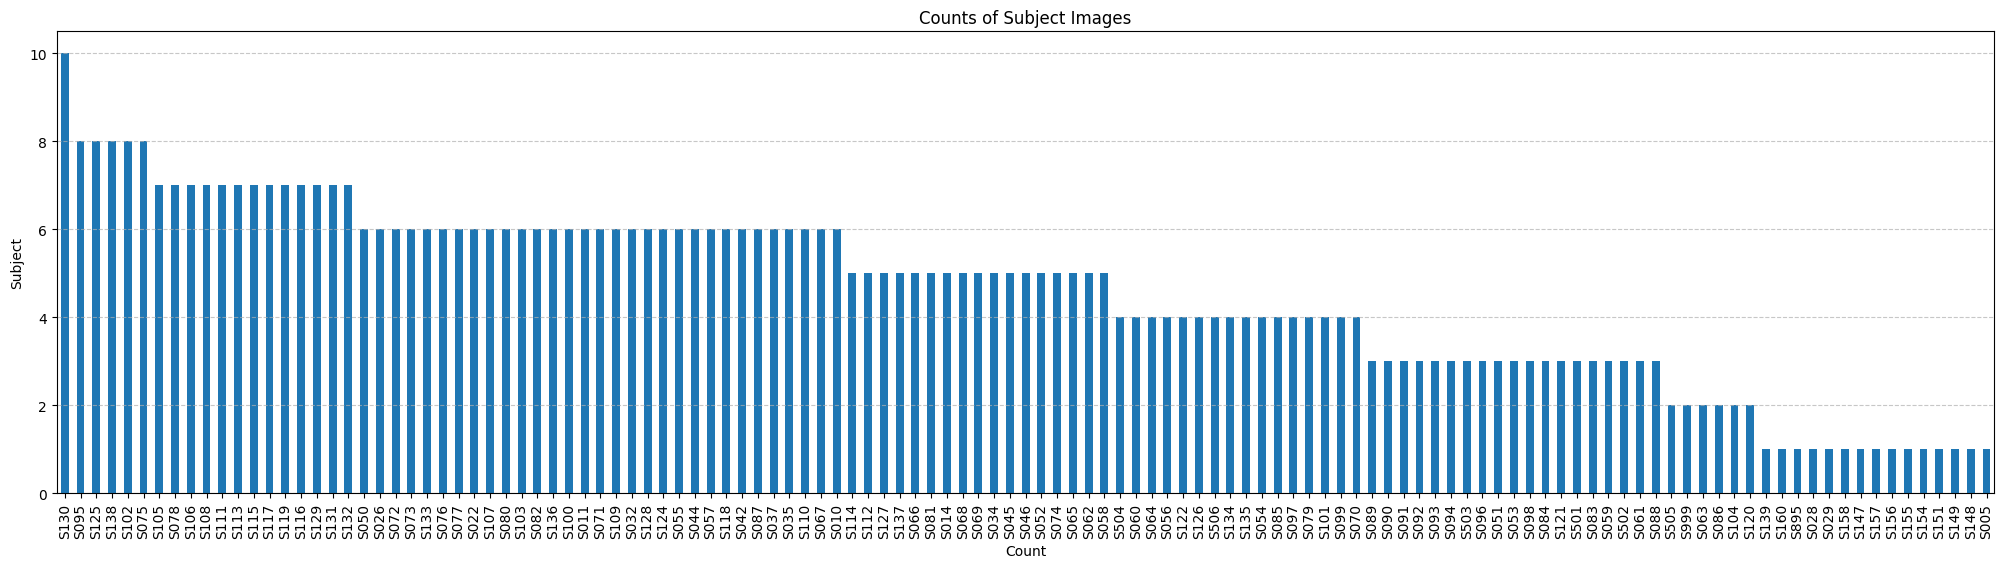

In [5]:
# Plotting the distribution of images per subject
plt.figure(figsize=(25, 6))

data["subject"].value_counts().plot(kind="bar")

plt.xlabel("Count")
plt.ylabel("Subject")
plt.title("Counts of Subject Images")
plt.grid(axis='y', alpha=0.7, linestyle='--')
plt.show()

# <font color='289C4E'>Train and Test Splits<font><a class='anchor' id='top'></a>
   
This code segment is essential for preparing the dataset before training machine learning models for emotion recognition and facial action unit classification. It ensures proper mapping of labels and appropriate distribution of data across training, validation, and testing sets to evaluate model performance.

In [6]:
# Create emotion mappings
emotions_to_labels = {'negative': 0, 'positive': 1, 'surprise': 2}

# Apply mappings to the target
emotion_labels = data['high_level_emotion'].map(emotions_to_labels).values
facs_labels = data[['AU17', 'AU1', 'AU2', 'AU25', 'AU27', 
                    'AU4', 'AU7', 'AU23', 'AU24', 'AU6', 
                    'AU12', 'AU15', 'AU14', 'AU11', 'AU26']].values

In [7]:
# Get unique subject IDs
unique_subjects = data['subject'].unique()

# Split subjects into training and remaining (validation + test)
subjects_train, subjects_remain = train_test_split(unique_subjects, test_size=0.2, random_state=42)

# Split remaining subjects into validation and test
subjects_val, subjects_test = train_test_split(subjects_remain, test_size=0.45, random_state=42)

# Create splits based on selected subjects
train_set = data[data['subject'].isin(subjects_train)]
val_set = data[data['subject'].isin(subjects_val)]
test_set = data[data['subject'].isin(subjects_test)]

# Save the sets
train_set.to_csv('train_set.csv', index=False)
val_set.to_csv('val_set.csv', index=False)
test_set.to_csv('test_set.csv', index=False)

In [8]:
print("Number of observations in the training set: ",len(train_set))
print("Number of observations in the validation set: ",len(val_set))
print("Number of observations in the testing set: ",len(test_set))

Number of observations in the training set:  443
Number of observations in the validation set:  60
Number of observations in the testing set:  57


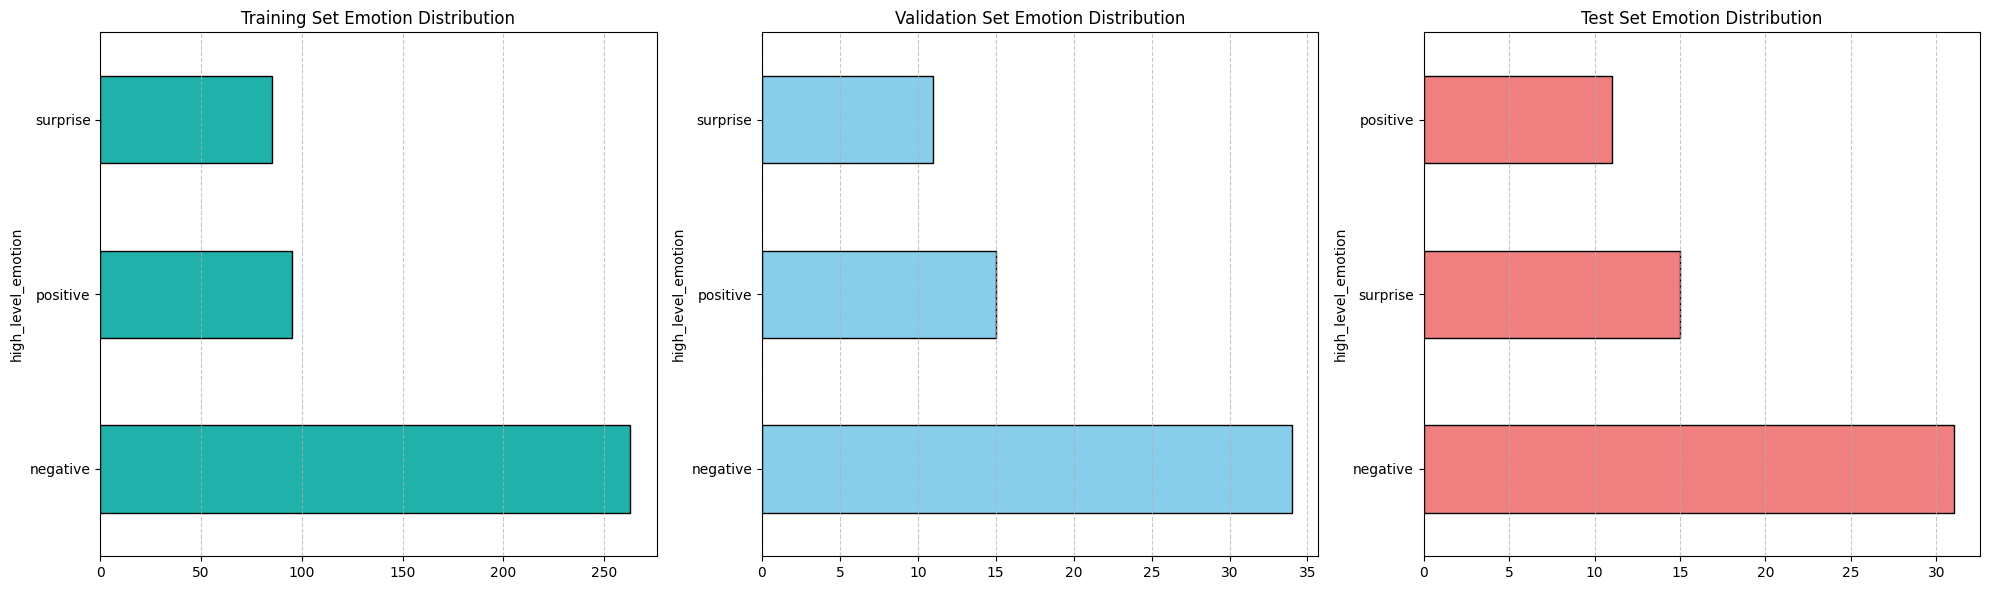

In [9]:
# Plot the distribution of emotion classes in the respective splits
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

train_set['high_level_emotion'].value_counts().plot(kind='barh', ax=axes[0], color='lightseagreen', edgecolor="k")
axes[0].set_title('Training Set Emotion Distribution')
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(axis='x', alpha=0.7, linestyle='--')

val_set['high_level_emotion'].value_counts().plot(kind='barh', ax=axes[1], color='skyblue', edgecolor="k")
axes[1].set_title('Validation Set Emotion Distribution')
axes[1].tick_params(axis='x', rotation=0)
axes[1].grid(axis='x', alpha=0.7, linestyle='--')

test_set['high_level_emotion'].value_counts().plot(kind='barh', ax=axes[2], color='lightcoral', edgecolor="k")
axes[2].set_title('Test Set Emotion Distribution')
axes[2].tick_params(axis='x', rotation=0)
axes[2].grid(axis='x', alpha=0.7, linestyle='--')

plt.tight_layout()
plt.show()

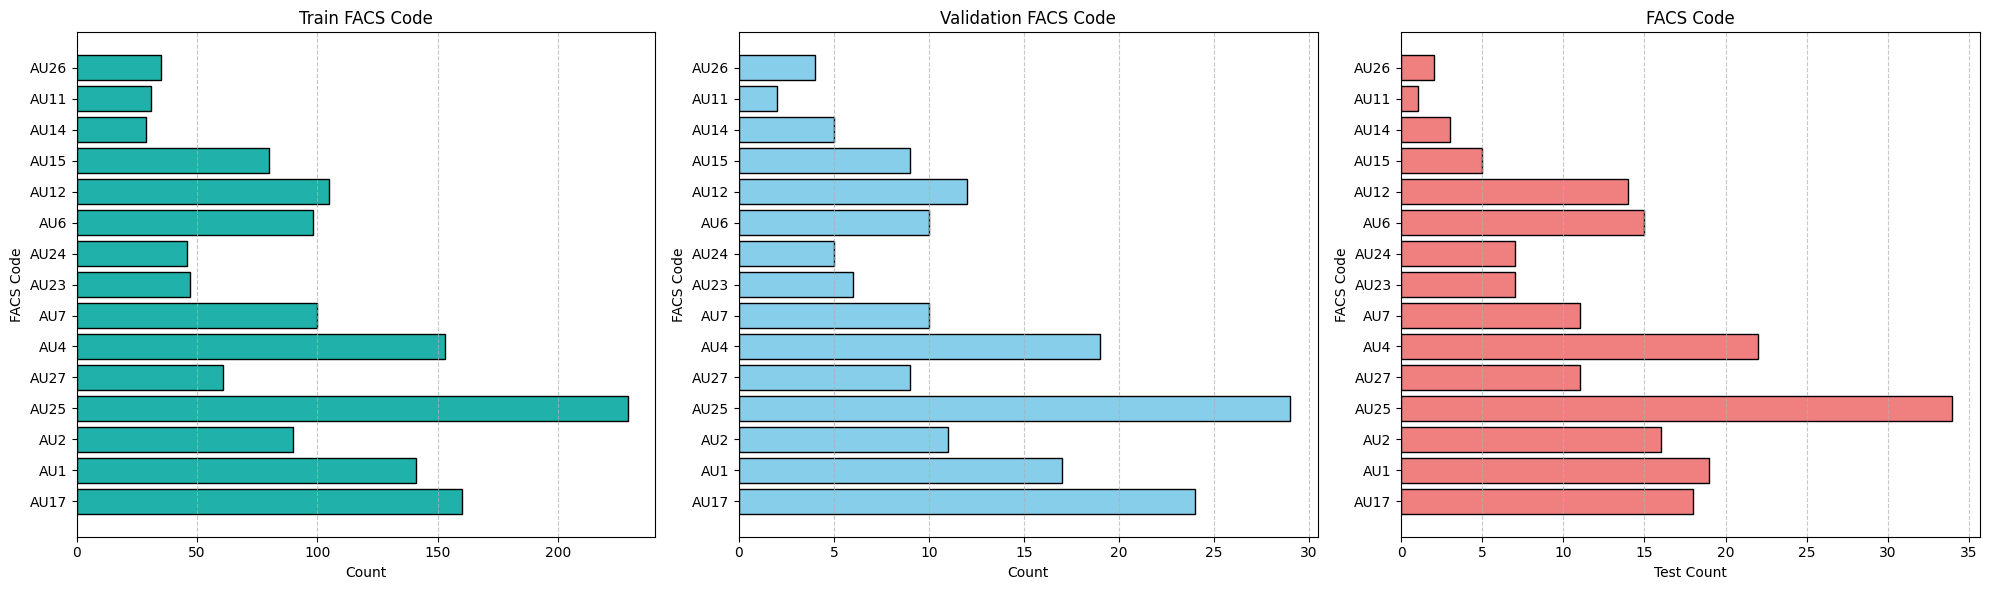

In [10]:
# Plot the distribution of FACS classes in the respective splits
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

train_counts = train_set[train_set.columns[5:20]].sum()
val_counts = val_set[val_set.columns[5:20]].sum()
test_counts = test_set[test_set.columns[5:20]].sum()

axes[0].barh(train_counts.index, train_counts.values, color='lightseagreen', edgecolor="k")
axes[0].set_xlabel('Count')
axes[0].set_ylabel('FACS Code')
axes[0].set_title('Train FACS Code')
axes[0].tick_params(axis="x")
axes[0].grid(axis='x', alpha=0.7, linestyle='--')

axes[1].barh(val_counts.index, val_counts.values, color='skyblue', edgecolor="k")
axes[1].set_xlabel('Count')
axes[1].set_ylabel('FACS Code')
axes[1].set_title('Validation FACS Code')
axes[1].tick_params(axis="x")
axes[1].grid(axis='x', alpha=0.7, linestyle='--')

axes[2].barh(test_counts.index, test_counts.values, color='lightcoral', edgecolor="k")
axes[2].set_xlabel('Test Count')
axes[2].set_ylabel('FACS Code')
axes[2].set_title('FACS Code')
axes[2].tick_params(axis="x")
axes[2].grid(axis='x', alpha=0.7, linestyle='--')

# Adjust the layout to prevent overlapping labels
plt.tight_layout()
plt.show()

# <font color='289C4E'>Conclusion<font><a class='anchor' id='top'></a>

### Data Structure
- The dataset includes various columns representing different Facial Action Coding System (FACS) codes and high-level emotion labels.
- All columns are well-typed, with integer values for FACS codes and categorical values for emotions.

### Data Completeness
- The dataset is complete with no missing values in the critical columns used for analysis and modeling.
- Each FACS code and high-level emotion has a consistent number of non-null entries, ensuring reliability in analysis.

### Distribution of Data
- **High-Level Emotions**: The distribution of high-level emotions reveals that specific emotions are more prevalent in the dataset. This insight can guide model training to ensure balanced learning.
- **FACS Codes**: The frequency of different FACS codes shows that certain facial action units, such as AU1 (Inner Brow Raiser) and AU17 (Chin Raiser), are more commonly activated. This can help in understanding which facial expressions are predominant.

### Data Splitting
- To evaluate model performance effectively, the dataset will be split into training and test sets, commonly using an 80-20 split ratio.
- Stratified splitting will be employed to maintain the proportional representation of each class (emotion) in both the training and test sets, preventing any class imbalance.
- Each subject has been photographed multiple times, ranging from 1 to 10 images. This means that for some subjects, there is only 1 image, while for others, there are up to 10 images. It is essential to consider this to avoid data leakage, ensuring that images of the same individual do not appear in both the training and test sets.

### Visualizations
- The visualizations provide a clear understanding of the data distribution, aiding in the identification of prevalent emotions and facial actions.
- The bar charts for high-level emotions and FACS codes are particularly useful for visualizing the frequency and distribution of these attributes.
